# Homework 1 Code

In [2]:
# Add import statements here
import numpy as np, matplotlib.pyplot as plt

## Perceptron Learning

The `perceptron_learn` function runs the Perceptron Learning Algorithm on input data.

Inputs: 
* `data_in` is a matrix with each row representing an $(x, y)$ pair; the $x$ vector is augmented with a leading 1, the label, $y$, is in the last column. 
Outputs:
The function outputs a tuple, `(w, iterations)`, where: 
* `w` is the learned weight vector; it should linearly separate the data if it is linearly separable.
* `iterations` is the number of iterations the algorithm ran for. 

In [3]:
def perceptron_learn(data_in):

  # Initialize all our variables 
  length = data_in.shape[0]
  dim = data_in.shape[1]-1 #this is the dimension of the weight vector, w. Equals number of columns in the input data matrix - 1
  w = np.zeros(dim) #initialize weight weight vector with all weights set to zero
  iterations = 0 #initialization iterations to be zero
  keepGoing = True
  index = 0

  while keepGoing:
    x = data_in[index] #get the example we want
    y = x[dim-1] #this is the classification of the sample in accordance with w*
    x = x[:-1] #remove w* classification from the example 
    w_out = np.sign(np.matmul(x,w)) #gives us the classification by w 
    #print("w_out is {} and y is {}".format(w_out, y))
    if w_out == y:
      if checkSeparable(data_in,w):
        keepGoing = False
        break
    else: 
      #w(t+1) = w(t) + yx
      w += y*x
      #print("new w is {}".format(w))
    
    if index == 100:
      index = 0
    else:
      index += 1

    iterations += 1
  
  return w, iterations

In [4]:
def checkSeparable(data_in, w):
  # Initialize all our variables 
  length = data_in.shape[0]-1
  dim = data_in.shape[1]-1 #this is the dimension of the weight vector, w. Equals number of columns in the input data matrix - 1
  for i in range(length): #iterate through every example
    x = data_in[i] #get the example we want
    y = x[dim-1] #this is the classification of the sample in accordance with w*
    x = x[:-1] #remove w* classification from the example
    
    #if w misclassifies an example, return false
    if np.sign(np.matmul(x,w)) != y: 
      return False

  #print("The data is separable")
  return True 

# Perceptron Experiment
Code for running the perceptron experiment in HW1. 

Inputs: 
* `N` is the number of training examples
* `d` is the dimensionality of each example (before adding the 1)
* `num_samples` is the number of times to repeat the experiment

Outputs:
* `num_iters` is the number of iterations the Perceptron Learning Algorithm takes for each sample
* `bound_minus_ni` is the difference between the theoretical bound and the actual number of iterations

Both outputs should be `num_samples` long.

In [5]:
def perceptron_experiment(N, d, num_samples):

  # Your code here, assign the values to num_ters and bounds_minus_ni:
  num_iters = []
  bounds_minus_ni = []
  
  for i in range(num_samples):
    #Create optimal set of wets
    wStar = np.array([0])
    wStar = np.append(0,np.random.rand(d))

    #Random training set
    tSet = np.random.choice([-1,1], size=(N,d))
    tSet = np.pad(tSet,(1,0), mode='constant',constant_values=1)

    

    #Let's get the outputs
    wStarX =  np.matmul(tSet,wStar)
    wStarX = wStarX[:,np.newaxis]
    #Now classify to get the y vector
    y = np.where(wStarX >= 0, 1,-1)

    #||w*||^2
    wStarNorm = np.linalg.norm(wStar)**2
    #print('wStarNorm = {}'.format(wStarNorm))

    #Get the max xn
    R = np.sum(np.abs(tSet)**2,axis=1)
    R = np.max(R)
    #print("R^2 is {}".format(R))
    
    #min of y(w*^Tx)
    p = np.einsum('ij,ij->i',y,wStarX) 
    p = np.amin(p) 

    #print('p is {}'.format(p))

    #Add the ys as the last column to our training set matrix, and now it's ready to go!
    tSet = np.concatenate((tSet, y), axis=1)

    

    #Run the perceptron learning algorithm
    a = perceptron_learn(tSet)
    num_iters.append(a[1])

    #Calculate the theoretical bound
    bound = np.floor((R*wStarNorm)/(p**2))
    bounds_minus_ni.append(bound - a[1])
    #print('bound is {}'.format(bound))
    
 
  #print(tSet, "tSet length is {}".format(len(tSet)), "w* is {}".format(wStar), "ys are {}".format(y),sep='\n')
  #print('number of iterations for each training set is {}'.format(num_iters))
  #print('bound minus number iterations is {}'.format(bounds_minus_ni))
  return num_iters, bounds_minus_ni

## Run and Plot

Run the code below

Bound Minus Iterations Mean is 472010230.183
Bound Minus Iterations Median is 118198.0


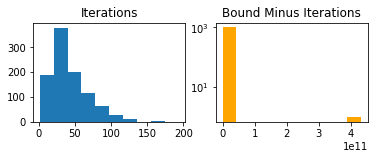

In [6]:
pla = perceptron_experiment(100, 10, 1000)

fig = plt.figure()
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax0.hist(pla[0])
ax1.hist(pla[1], color='orange', log=True)
ax0.title.set_text('Iterations')
ax1.title.set_text('Bound Minus Iterations')


bmni_mean = np.mean(pla[1])
bmni_median = np.median(pla[1])

print('Bound Minus Iterations Mean is {}'.format(bmni_mean))
print('Bound Minus Iterations Median is {}'.format(bmni_median))


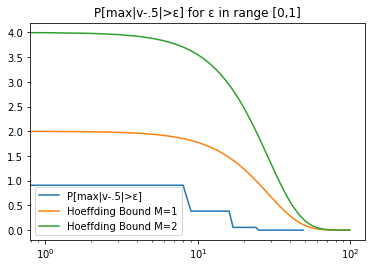

In [7]:
#Problem 1.7 Part B
#Reference, Thank you: https://dsevero.com/posts/lfd-p17/ 


def hoeffdings(N, ep, M):
  return 2*M*np.exp(-2*N*ep**2)


#Probability that max training error minus expectied error is greater than epsilon
def P(N, mu, e_interval, M):
  k = np.random.binomial(n=N, p=mu, size=(1000,M))
  P = np.abs(k/N-mu).max(axis=1)
  return [(P > ep).mean() for ep in e_interval]


e_interval = np.linspace(0,1)
prob = P(6, .5, e_interval, 2)
bounds_1 = []
for i in range(100):
  bounds_1.append(hoeffdings(6, i/100, 1))

bounds_2 = []
for i in range(100):
  bounds_2.append(hoeffdings(6, i/100, 2))

plt.title('P[max|v-.5|>ε] for ε in range [0,1]')

plt.plot(prob)
plt.plot(bounds_1)
plt.plot(bounds_2)

plt.legend(['P[max|v-.5|>ε]', 'Hoeffding Bound M=1', 'Hoeffding Bound M=2'])
plt.xscale('Log')